**1. Introduction**:

In this report, relations between 3 datasets taken from EVDS are examined. Datasets taken from EVDS are unemployment rates, consumer confidence index and business closure rates. Even though the correlation between each dataset is less than 0.5, it's worthwhile to examine how these datasets interact with eachother since high unemployment rates can lead to reduced consumer confidence and spending, which can, in turn, result in higher level of business closures. Conversely, improved employment rates can improve consumer confidence thus stimulate economic activity and reduce business closures.

In [ ]:
# install.packages("openxlsx")
# install.packages("ggplot2")
# install.packages("skimr")
# install.packages("forecast")
# install.packages("data.table")
# install.packages("GGally")
# install.packages("ggcorrplot")
# install.packages("lubridate")

Importing Packages

In [84]:
require(openxlsx)
require(ggplot2)
require(data.table)
require(skimr)
require(GGally)
require(ggcorrplot)
require(forecast)
require(lubridate)

Reading the Datafile.

In [85]:
all_data <- read.xlsx("EVDS.xlsx")
head(all_data)

,Tarih,TPYISGUCU2G8,TPTG2Y01,TPKAP2TOP.A,ihtiyac.kredisi,is.ilani,dusen.hisseler
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2014-01,10.5,91.53853,2892,5,42,6
2,2014-02,10.5,89.21453,1181,4,45,5
3,2014-03,9.4,92.42525,1073,4,38,0
4,2014-04,8.8,97.36987,937,4,40,0
5,2014-05,8.4,95.11075,968,4,39,0
6,2014-06,9.0,93.49903,1120,6,45,3


In [ ]:
all_data <- all_data[1:120,] # Get rid of the explanation lines and trim last data which is only data in 2024 on the bottom of the excel file.
head(all_data)

,Tarih,TPYISGUCU2G8,TPTG2Y01,TPKAP2TOP.A,ihtiyackredisi,isilani,dusenhisseler
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2014-01,10.5,91.53853,2892,5,42,6
2,2014-02,10.5,89.21453,1181,4,45,5
3,2014-03,9.4,92.42525,1073,4,38,0
4,2014-04,8.8,97.36987,937,4,40,0
5,2014-05,8.4,95.11075,968,4,39,0
6,2014-06,9.0,93.49903,1120,6,45,3


In [ ]:
# Converting numeric data's datatype.
all_data$TPYISGUCU2G8<-as.numeric(all_data$TPYISGUCU2G8)
all_data$TPTG2Y01<-as.numeric(all_data$TPTG2Y01)
all_data$TPKAP2TOP.A<-as.numeric(all_data$TPKAP2TOP.A)
head(all_data)

,Tarih,TPYISGUCU2G8,TPTG2Y01,TPKAP2TOP.A,ihtiyackredisi,isilani,dusenhisseler
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2014-01,10.5,91.53853,2892,5,42,6
2,2014-02,10.5,89.21453,1181,4,45,5
3,2014-03,9.4,92.42525,1073,4,38,0
4,2014-04,8.8,97.36987,937,4,40,0
5,2014-05,8.4,95.11075,968,4,39,0
6,2014-06,9.0,93.49903,1120,6,45,3


First start by finding the correlation of 3 datasets among each other.

With openxlsx col functions

In [ ]:
unemployment <- all_data$TPYISGUCU2G8
cci <- all_data$TPTG2Y01
comp <- all_data$TPKAP2TOP.A

# Combine all datasets into a data frame
data <- data.frame(unemployment, cci, comp)

# Calculate correlation matrix
correlation_matrix <- cor(data)

# Print correlation matrix
print(correlation_matrix)

             unemployment        cci       comp
unemployment    1.0000000 -0.2131913 -0.1207401
cci            -0.2131913  1.0000000 -0.3671882
comp           -0.1207401 -0.3671882  1.0000000


Manuel correction of the openxlsx col function.

In [ ]:
# First dataset: Unemployment rate
unemployment <- c(10.50, 10.50, 9.40, 8.80, 8.40, 9.00, 9.70, 10.10, 10.10, 10.90, 10.40,
                  10.80, 11.90, 11.70, 10.40, 9.60, 8.90, 9.60, 10.00, 10.00, 10.30, 10.50,
                  10.20, 10.90, 11.50, 11.00, 10.10, 9.10, 9.00, 10.10, 11.00, 11.00, 11.80,
                  11.90, 11.60, 12.80, 13.50, 12.90, 11.70, 10.50, 9.70, 10.40, 10.60, 10.60,
                  10.40, 10.50, 10.00, 10.30, 11.00, 10.80, 9.80, 9.30, 9.40, 10.20, 10.70, 11.10,
                  11.40, 11.70, 12.00, 13.30, 15.10, 15.00, 13.90, 12.90, 12.50, 13.40, 14.10, 14.20,
                  14.00, 13.30, 12.90, 13.60, 14.10, 13.50, 13.00, 12.80, 12.60, 13.00, 14.60, 13.00,
                  12.40, 12.80, 12.90, 13.00, 13.40, 14.10, 13.10, 12.90, 12.40, 10.40, 12.10, 12.00,
                  11.10, 10.70, 10.90, 11.30, 12.10, 11.40, 11.40, 10.60, 10.10, 9.70, 10.60, 9.80,
                  9.90, 9.90, 9.90, 10.40, 10.30, 10.70, 10.20, 10.00, 8.80, 9.00, 9.70, 9.20, 8.90,
                  8.20, 8.80, 8.90, 9.80)

# Second dataset: consumer confidence index
cci  <- c(91.54, 89.21, 92.43, 97.37, 95.11, 93.50, 93.73, 93.65, 94.02, 91.43, 90.87,
          90.15, 89.35, 88.80, 86.49, 87.42, 86.80, 89.63, 88.24, 85.20, 82.15, 86.04,
          95.15, 93.34, 91.95, 89.68, 89.87, 91.25, 91.70, 92.01, 89.66, 95.17, 94.78,
          95.02, 91.41, 87.01, 88.39, 87.63, 89.89, 91.95, 94.22, 92.67, 93.21, 93.49,
          92.00, 89.60, 87.35, 87.81, 92.38, 92.97, 92.28, 91.65, 90.95, 91.05, 92.92,
          88.70, 81.15, 78.42, 80.95, 79.66, 80.11, 78.79, 81.10, 83.61, 77.05, 80.09,
          78.94, 79.60, 77.64, 78.17, 81.24, 80.49, 81.12, 79.29, 80.98, 78.18, 82.85,
          82.98, 82.82, 79.77, 81.91, 81.54, 79.98, 79.80, 82.87, 84.11, 86.63, 80.25,
          77.53, 81.97, 80.09, 78.49, 79.60, 76.46, 70.85, 68.51, 72.74, 70.77, 72.57,
          67.28, 67.76, 63.41, 68.51, 72.73, 72.87, 76.25, 76.58, 75.38, 79.10, 82.50,
          80.13, 87.52, 91.06, 85.13, 80.07, 68.01, 71.47, 74.62, 75.47, 77.42, 80.42)

# Third dataset: number of companies closed
comp <- c(2892.00, 1181.00, 1073.00, 937.00, 968.00, 1120.00, 1136.00, 874.00, 995.00, 1002.00, 1083.00,
          2561.00, 2734.00, 1091.00, 1000.00, 992.00, 712.00, 980.00, 1053.00, 760.00, 774.00, 755.00,
          811.00, 2039.00, 2178.00, 867.00, 780.00, 691.00, 581.00, 878.00, 602.00, 689.00, 903.00, 1096.00,
          1167.00, 1896.00, 2142.00, 815.00, 720.00, 810.00, 861.00, 1112.00, 1211.00, 1312.00, 951.00, 1375.00,
          1228.00, 2163.00, 2417.00, 682.00, 780.00, 623.00, 652.00, 752.00, 1017.00, 954.00, 1183.00, 1235.00,
          1112.00, 2186.00, 2092.00, 665.00, 693.00, 776.00, 946.00, 756.00, 1213.00, 1011.00, 1233.00, 1272.00,
          1103.00, 2290.00, 2292.00, 865.00, 821.00, 427.00, 517.00, 1130.00, 1514.00, 1305.00, 1582.00, 1331.00,
          986.00, 3179.00, 958.00, 775.00, 1015.00, 1017.00, 563.00, 1269.00, 1141.00, 1442.00, 1687.00, 1599.00,
          1661.00, 4057.00, 1088.00, 806.00, 1424.00, 2225.00, 2053.00, 2755.00, 1662.00, 1784.00, 2066.00,
          1799.00, 1749.00, 4891.00, 1646.00, 1225.00, 1506.00, 1458.00, 2079.00, 1938.00, 2156.00, 1784.00,
          2096.00, 2331.00, 2497.00, 6236.00, 1759.00)

# Combine all datasets into a data frame
data <- data.frame(unemployment, cci, comp)

# Calculate correlation matrix
correlation_matrix <- cor(data)

# Print correlation matrix
print(correlation_matrix)


             unemployment        cci       comp
unemployment    1.0000000 -0.2089484 -0.1232519
cci            -0.2089484  1.0000000 -0.3682367
comp           -0.1232519 -0.3682367  1.0000000


In [86]:
all_data$Tarih=paste(all_data$Tarih,"-01",sep ="")  # In order to easily parse char data into date type.
all_data$Tarih=as_date(all_data$Tarih, format="%Y-%m-%d")
head(all_data)

Warning message:
“ 1 failed to parse.”


,Tarih,TPYISGUCU2G8,TPTG2Y01,TPKAP2TOP.A,ihtiyac.kredisi,is.ilani,dusen.hisseler
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2014-01-01,10.5,91.53853,2892,5,42,6
2,2014-02-01,10.5,89.21453,1181,4,45,5
3,2014-03-01,9.4,92.42525,1073,4,38,0
4,2014-04-01,8.8,97.36987,937,4,40,0
5,2014-05-01,8.4,95.11075,968,4,39,0
6,2014-06-01,9.0,93.49903,1120,6,45,3


In [ ]:
all_data=setDT(all_data) # convert dataframe to data table to make data manipulation easy
head(all_data)

Tarih,TPYISGUCU2G8,TPTG2Y01,TPKAP2TOP.A,ihtiyackredisi,isilani,dusenhisseler
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014-01-01,10.5,91.53853,2892,5,42,6
2014-02-01,10.5,89.21453,1181,4,45,5
2014-03-01,9.4,92.42525,1073,4,38,0
2014-04-01,8.8,97.36987,937,4,40,0
2014-05-01,8.4,95.11075,968,4,39,0
2014-06-01,9.0,93.49903,1120,6,45,3


Lets construct the summary of the data in order to correctly find dimensions of following plots.

In [ ]:
summary_data=summary(all_data)
summary_data

     Tarih             TPYISGUCU2G8      TPTG2Y01      TPKAP2TOP.A    
 Min.   :2014-01-01   Min.   : 8.20   Min.   :63.41   Min.   : 427.0  
 1st Qu.:2016-06-23   1st Qu.:10.00   1st Qu.:79.24   1st Qu.: 866.5  
 Median :2018-12-16   Median :10.75   Median :83.86   Median :1125.0  
 Mean   :2018-12-16   Mean   :11.17   Mean   :84.14   Mean   :1404.8  
 3rd Qu.:2021-06-08   3rd Qu.:12.53   3rd Qu.:91.11   3rd Qu.:1757.8  
 Max.   :2023-12-01   Max.   :15.10   Max.   :97.37   Max.   :6236.0  
 ihtiyackredisi      isilani       dusenhisseler   
 Min.   :  4.00   Min.   : 29.00   Min.   :  0.00  
 1st Qu.:  5.00   1st Qu.: 45.00   1st Qu.:  3.00  
 Median :  7.00   Median : 51.00   Median : 10.00  
 Mean   : 10.06   Mean   : 55.15   Mean   : 21.92  
 3rd Qu.: 10.00   3rd Qu.: 63.25   3rd Qu.: 41.00  
 Max.   :100.00   Max.   :100.00   Max.   :100.00  

In [ ]:
all_data[,year:=format(Tarih,"%Y")]   #  add year in order to make things easier while plotting.
head(all_data)

Tarih,TPYISGUCU2G8,TPTG2Y01,TPKAP2TOP.A,ihtiyackredisi,isilani,dusenhisseler,year
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2014-01-01,10.5,91.53853,2892,5,42,6,2014
2014-02-01,10.5,89.21453,1181,4,45,5,2014
2014-03-01,9.4,92.42525,1073,4,38,0,2014
2014-04-01,8.8,97.36987,937,4,40,0,2014
2014-05-01,8.4,95.11075,968,4,39,0,2014
2014-06-01,9.0,93.49903,1120,6,45,3,2014


** 2. Unemployment Rates**


In this part of the report, unemployment rates will be examined from 2014 to 2023. To get better insights from the data we have, we will use some plots and visualize.

Unemployment rate can be seen in the following as a line plot:

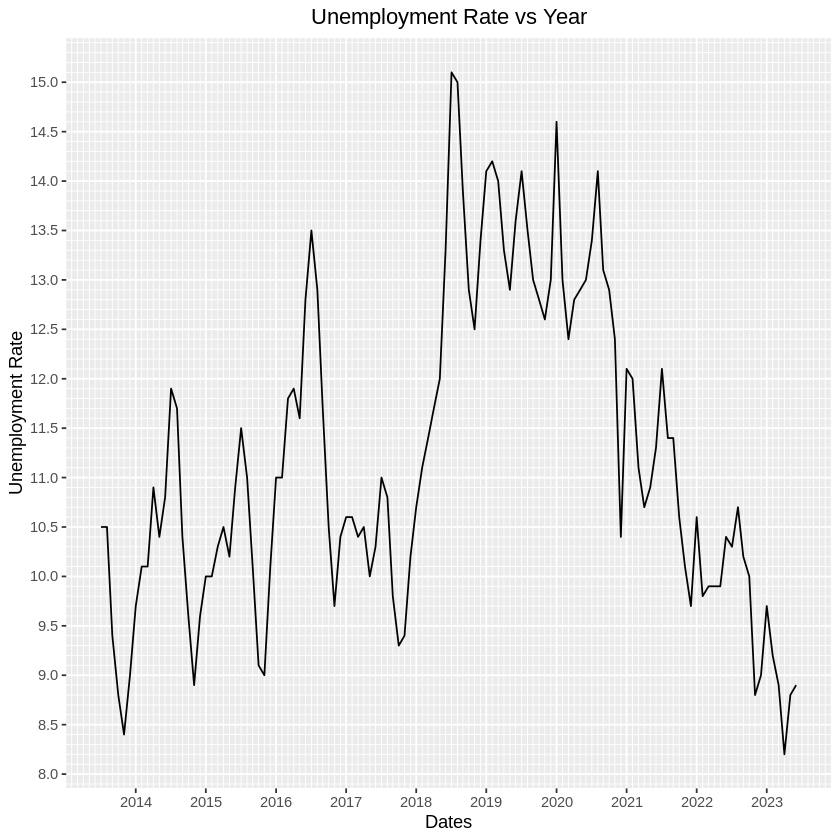

In [ ]:
ggplot(all_data, aes(x=Tarih, y=TPYISGUCU2G8)) +
  geom_line()+
  labs(title = "Unemployment Rate vs Year",
       x = "Dates",
       y = "Unemployment Rate")+
  theme(plot.title = element_text(hjust=0.5))+
  scale_x_date(date_breaks = "12 month",
               date_labels = "%Y",
               date_minor_breaks = "1 month") +
  scale_y_continuous(breaks = seq(from = 0,to = 16,by = 0.5),
                     minor_breaks = seq(from = 0,to = 16,by = 0.1))

The data has periodic waves with an overall increasing trend until 2020, and a relatively steeper decrease trend after 2020. The main reason behind this cyclical pattern is the seasonal workers such as employees of the tourism sector, agricultural workers etc.To be able to see the increase and decrease in the data more clearly, it may be logical to print boxplots for each year since their some statistics such as median,mean etc. will give us some insights to compare different years.

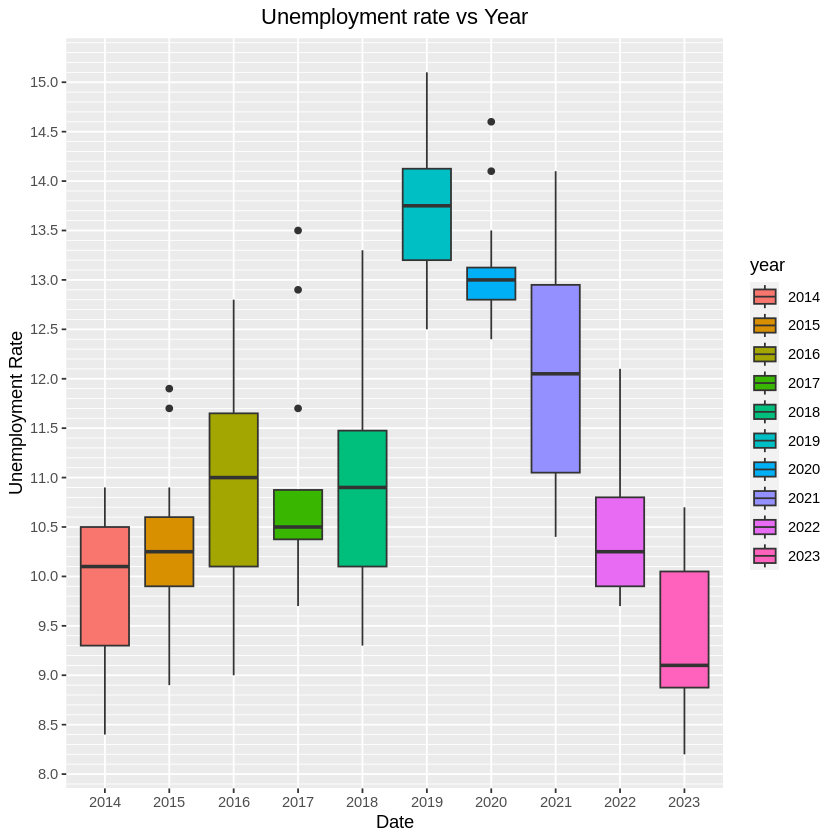

In [ ]:
ggplot(all_data, aes(x=year, y=TPYISGUCU2G8))+
  geom_boxplot(aes(y=TPYISGUCU2G8,fill=year))+
  scale_y_continuous(breaks = seq(from = 0,to = 16,by = 0.5),
                     minor_breaks = seq(from = 0,to = 16,by = 0.1)) +
  labs(title="Unemployment rate vs Year",
       y = "Unemployment Rate",
       x = "Date") +
  theme(plot.title = element_text(hjust=0.5))

The gradual increase in unemployment rates was evident annually until 2018. The unemployment rate increased much more between 2018 and 2019 than in previous years. However, there was a slight decline in rates starting from 2020. There is a high level of fluctuation in the median levels. Given that the data is recorded monthly, there are typically 12 data points for each year, to be aware of the fluctuations within a year, distribution of rates in a year may be examined.

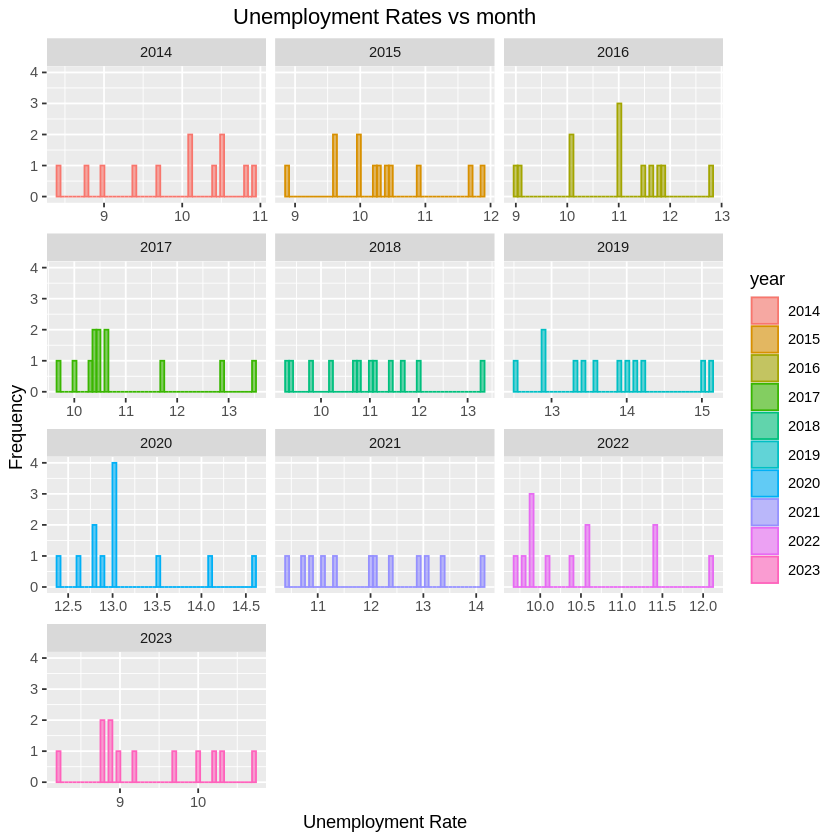

In [ ]:
ggplot(all_data, aes(x=TPYISGUCU2G8)) +
  geom_histogram(bins=50,alpha=0.6,aes(color=year,fill=year)) +
  facet_wrap(year~.,scales="free_x",ncol = 3) +
  labs(title = "Unemployment Rates vs month",
       y = "Frequency",
       x = "Unemployment Rate")+
  theme(plot.title = element_text(hjust=0.5))

To be able to visualize the fluctuations of unemployment rates within a year, we will use a histogram. Observing the histogram we can deduce that X-axes values have been increasing and we further observe wide range of distribution for highly fluctuated years.

**3. Consumer Confidence Index**

In this section, we will utilize same plots as the previous section to analyze the relation between unemployment and consumer confidence index. As mentioned in the introduction, we anticipate a significant degree of interdependence between these factors.

First, observe the line graph for cci:

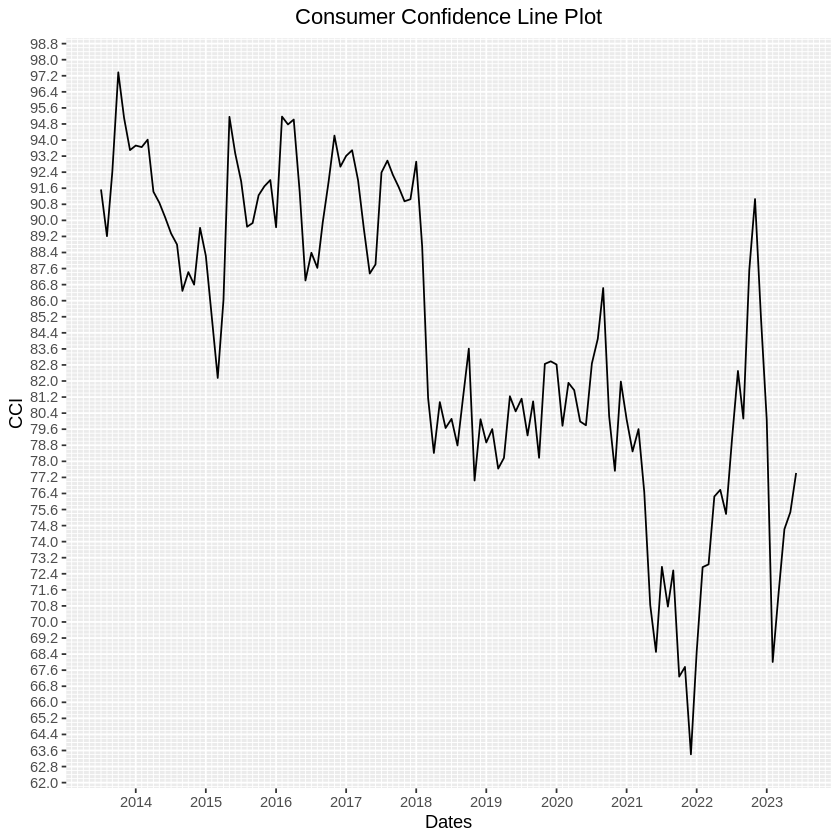

In [ ]:
ggplot(all_data, aes(x=Tarih, y=TPTG2Y01)) +
  geom_line()+
  labs(title = "Consumer Confidence Line Plot",
       x = "Dates",
       y = "CCI")+
  theme(plot.title = element_text(hjust=0.5))+
  scale_x_date(date_breaks = "12 month",
               date_labels = "%Y",
               date_minor_breaks = "1 month") +
  scale_y_continuous(breaks = seq(from = 50,to = 100,by = 0.8),
                     minor_breaks = seq(from = 50,to = 100,by = 0.2))

We observe a gradual overall decrease in the consumer confidence levels with fluctiations until 2022 and a rapid increase after 2022 until the next year. Therefore as stated in the introduction section, we can observe a negative relation between consumer confidence levels and unemployment rates. We can observe a rapid decrease in cci level in 2018 and conversely a rapid increase in the unemployment rate during the same period.  

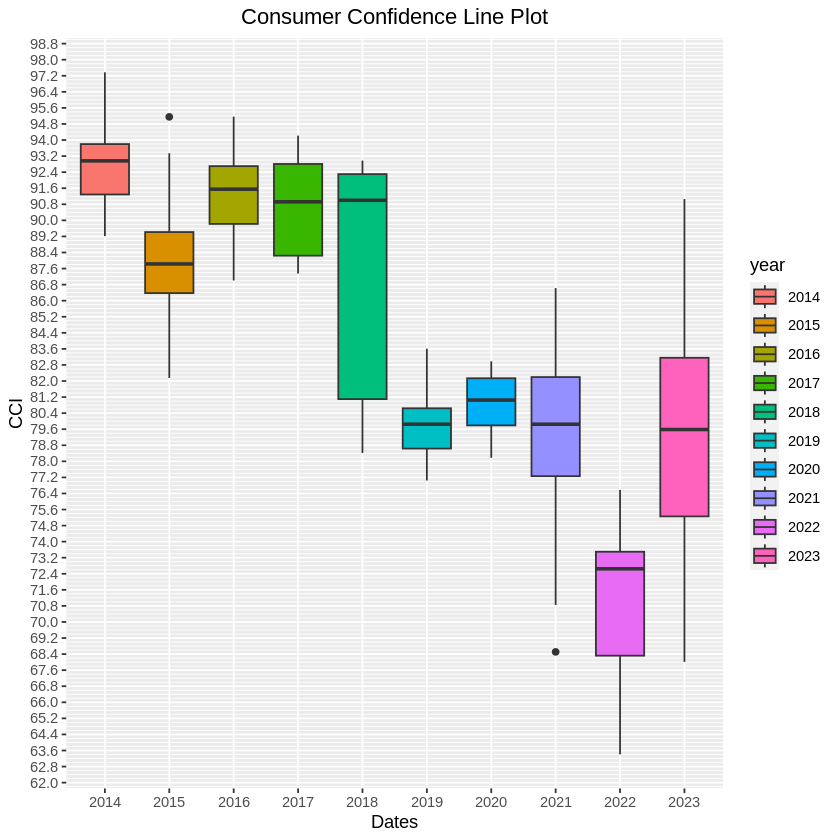

In [ ]:
ggplot(all_data, aes(x=year, y=TPTG2Y01))+
  geom_boxplot(aes(y=TPTG2Y01,fill=year))+
  scale_y_continuous(breaks = seq(from = 50,to = 100,by = 0.8),
                     minor_breaks = seq(from = 50,to = 100,by = 0.2)) +
  labs(title = "Consumer Confidence Line Plot",
        x = "Dates",
        y = "CCI")+
  theme(plot.title = element_text(hjust=0.5))

Similar patterns can be observed in the
boxplot. Both of these plots support the idea that there is a negative relation between unemployment rates and consumer condifence index.

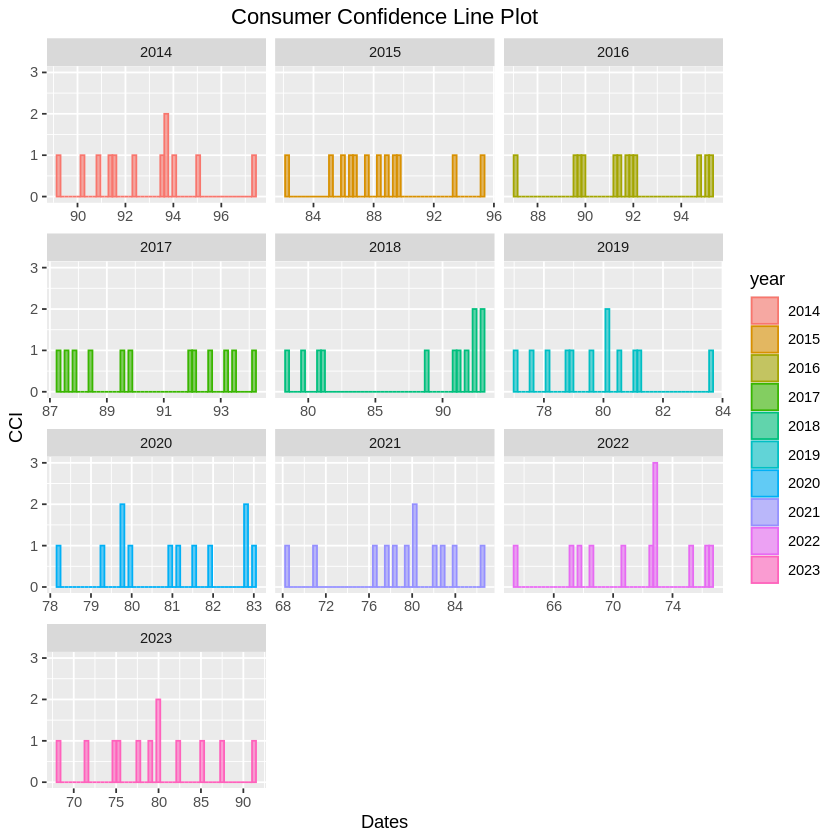

In [ ]:
ggplot(all_data, aes(x=TPTG2Y01)) +
  geom_histogram(bins=50,alpha=0.6,aes(color=year,fill=year)) +
  facet_wrap(year~.,scales="free_x",ncol = 3) +
  labs(title = "Consumer Confidence Line Plot",
        x = "Dates",
        y = "CCI")+
  theme(plot.title = element_text(hjust=0.5))

**4. Business Closure Rates**



So far we observed a negative relation between cci and unemployment rates. In this section we will analyse business closure rates which may give us evidence to further suppport our statements in the introduction section.

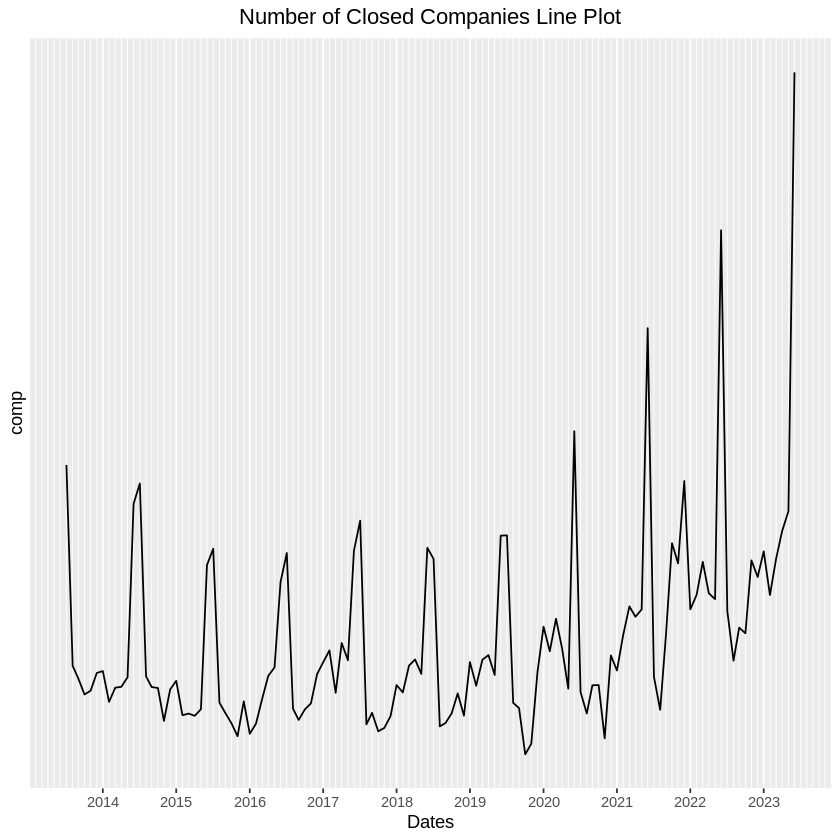

In [ ]:
ggplot(all_data, aes(x=Tarih, y=TPKAP2TOP.A)) +
  geom_line()+
  labs(title = "Number of Closed Companies Line Plot",
       x = "Dates",
       y = "comp")+
  theme(plot.title = element_text(hjust=0.5))+
  scale_x_date(date_breaks = "12 month",
               date_labels = "%Y",
               date_minor_breaks = "1 month") +
  scale_y_continuous(breaks = seq(from = 50,to = 100,by = 0.4),
                     minor_breaks = seq(from = 50,to = 100,by = 0.1))

Contrary to our predictions, business closure plot is not very similar to the unemployment graph or counter-related to the consumer confidence levels. We can observe this contingency specially in 2022,where we would expect a decrease in business closure rates since consumer confident levels were increasing throughout that year.

Boxplot for business closure levels throughout the years can be observed below.

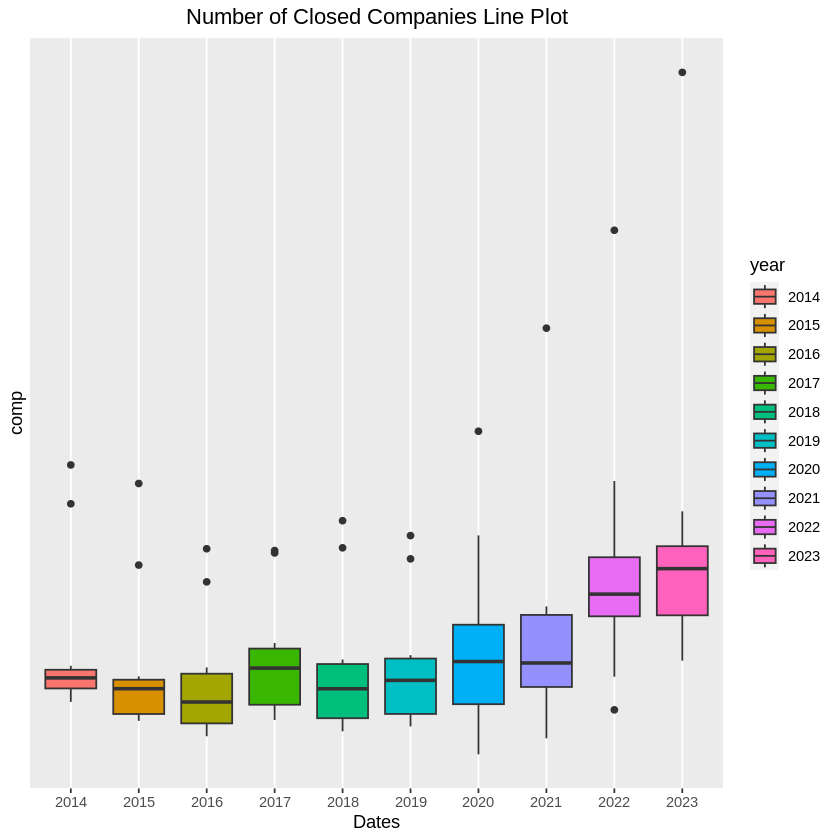

In [ ]:
ggplot(all_data, aes(x=year, y=TPKAP2TOP.A))+
  geom_boxplot(aes(y=TPKAP2TOP.A,fill=year))+
  scale_y_continuous(breaks = seq(from = 50,to = 100,by = 0.4),
                     minor_breaks = seq(from = 50,to = 100,by = 0.1)) +
  labs(title = "Number of Closed Companies Line Plot",
       x = "Dates",
       y = "comp")+
  theme(plot.title = element_text(hjust=0.5))

Histogram for business closure levels throughout the years can be observed below.

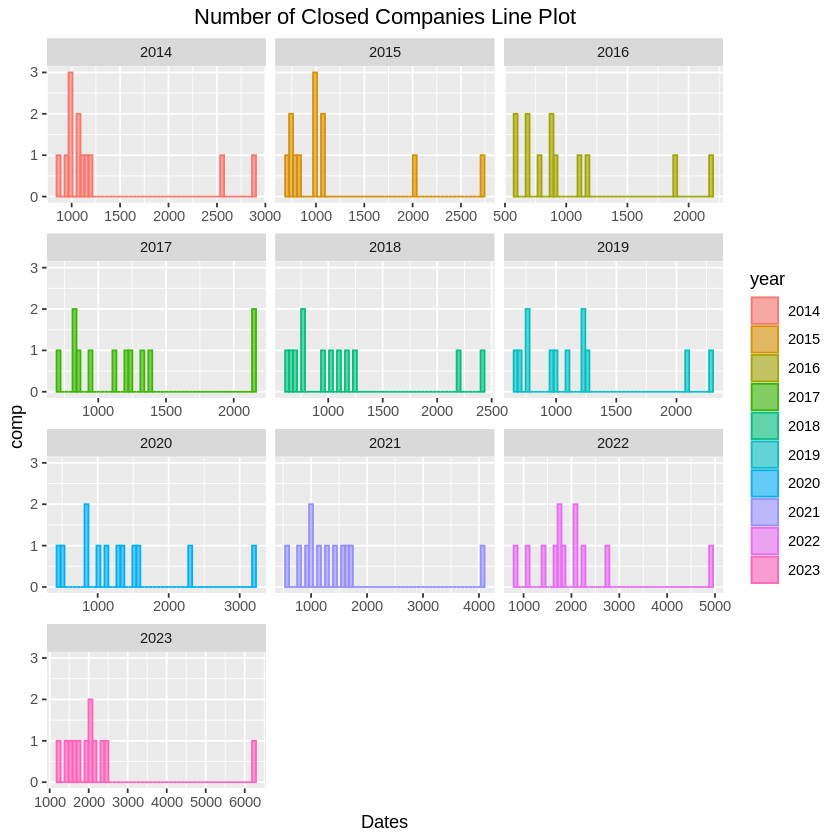

In [ ]:
ggplot(all_data, aes(x=TPKAP2TOP.A)) +
  geom_histogram(bins=50,alpha=0.6,aes(color=year,fill=year)) +
  facet_wrap(year~.,scales="free_x",ncol = 3) +
  labs(title = "Number of Closed Companies Line Plot",
       x = "Dates",
       y = "comp")+
  theme(plot.title = element_text(hjust=0.5))

**5. Comparison with trend data**

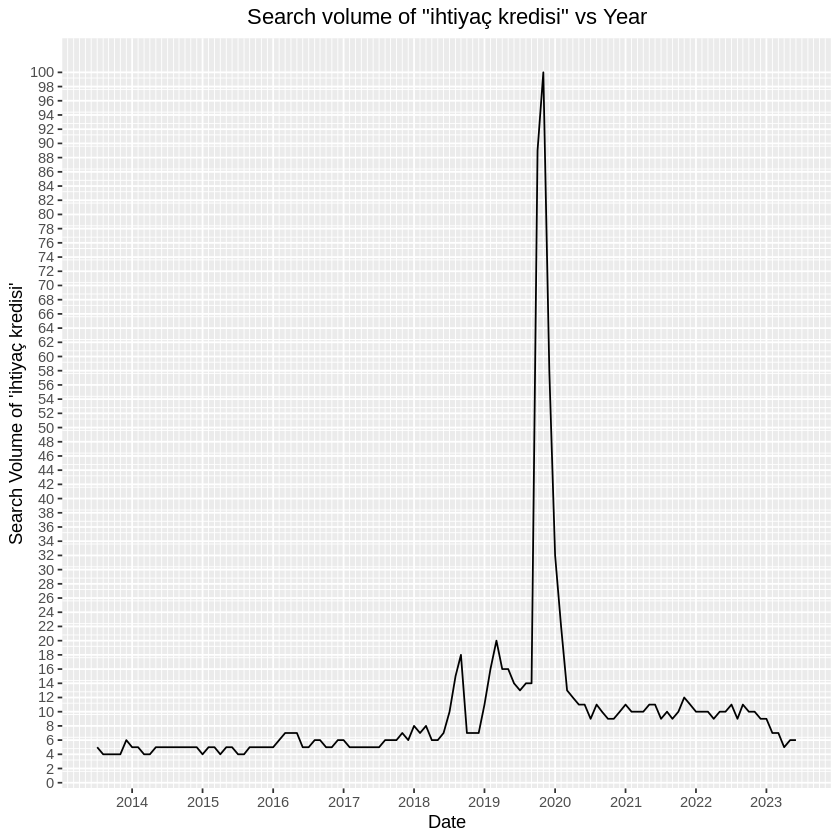

In [ ]:
ggplot(all_data, aes(x=Tarih, y=ihtiyackredisi)) +
  geom_line()+
  labs(title = "Search volume of \"ihtiyaç kredisi\" vs Year",
       x = "Date",
       y = "Search Volume of 'ihtiyaç kredisi'")+
  theme(plot.title = element_text(hjust=0.5))+
  scale_x_date(date_breaks = "12 month",
               date_labels = "%Y",
               date_minor_breaks = "1 month") +
  scale_y_continuous(breaks = seq(from = 0,to = 100,by = 2.0),
                     minor_breaks = seq(from = 0,to = 100,by = 1.6))

When we compare Consumer confidence levels and search volume for consumer loans, we expect negative corelation since as the consumer confidence levels deacrease, more people will have to utilize some kind of loan. To test whether this idea is reasonable, we can compare the plots of the two series. Once we compare the plots, we can't find enough evidence of negative corelation to support our idea.

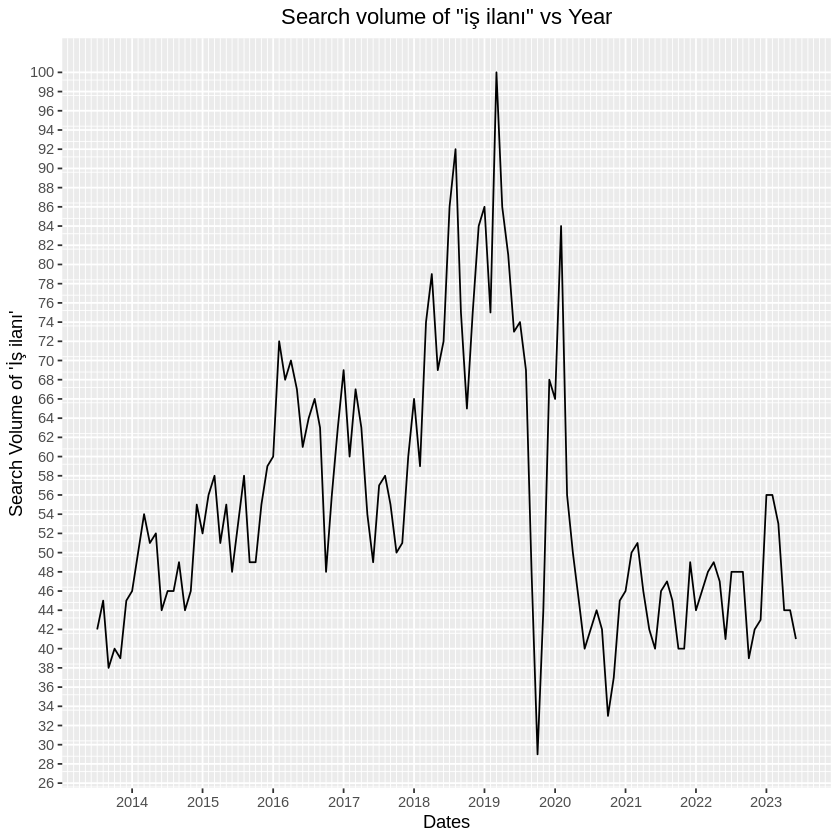

In [ ]:
ggplot(all_data, aes(x=Tarih, y=isilani)) +
  geom_line()+
  labs(title = 'Search volume of "iş ilanı" vs Year',
       x = "Dates",
       y = "Search Volume of 'İş ilanı'")+
  theme(plot.title = element_text(hjust=0.5))+
  scale_x_date(date_breaks = "12 month",
               date_labels = "%Y",
               date_minor_breaks = "1 month") +
  scale_y_continuous(breaks = seq(from = 0,to = 100,by = 2.0),
                     minor_breaks = seq(from = 0,to = 100,by = 1.6))

When comparing unemployment rates and search volume for available jobs (in this case, "iş ilanı" ), we expect to see a positive relation. Once we observe the two plots it can be seen that unemployment rates have been rapidly increasing from late 2017 to the beginning of 2019; similarly, search volume has been gradually increasing during the period mentioned.

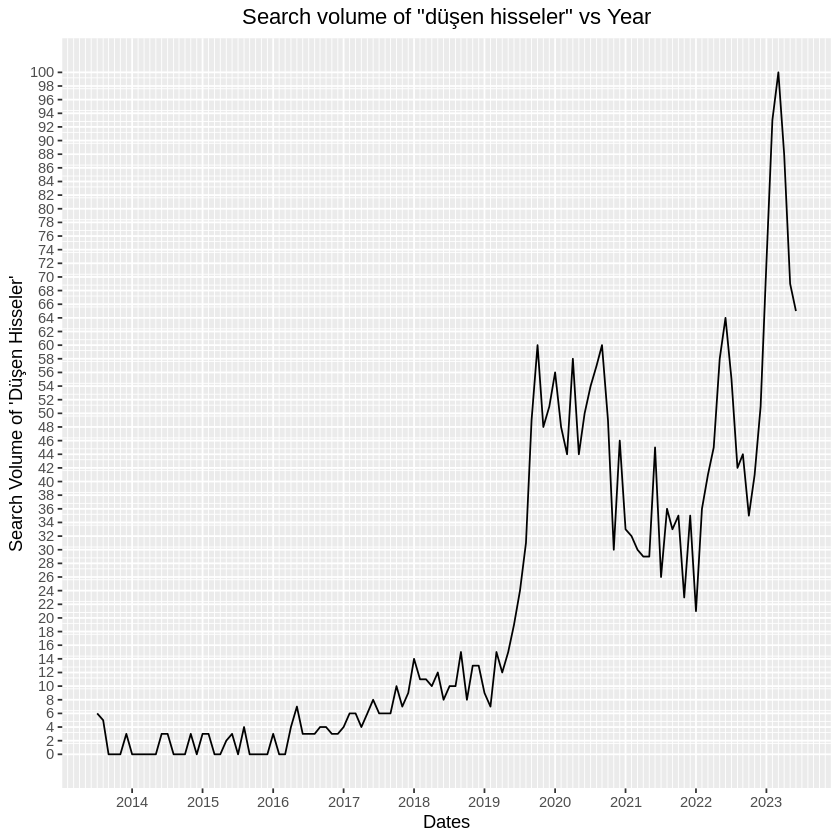

In [ ]:
ggplot(all_data, aes(x=Tarih, y=dusenhisseler)) +
  geom_line()+
  labs(title = 'Search volume of "düşen hisseler" vs Year',
       x = "Dates",
       y = "Search Volume of 'Düşen Hisseler'")+
  theme(plot.title = element_text(hjust=0.5))+
  scale_x_date(date_breaks = "12 month",
               date_labels = "%Y",
               date_minor_breaks = "1 month") +
  scale_y_continuous(breaks = seq(from = 0,to = 100,by = 2.0),
                     minor_breaks = seq(from = 0,to = 100,by = 1.6))

To see if the rate of closed companies is related to the search volume of decreasing stock prices in any way, we compare their plots over time. While both increase with time, there is no clear relation between the two datasets.


**6.Conclusion**


This report entails an examination of various datasets and their interrelations. To conclude our findings, we should mention that trend data did not really fit our predictions however we were able to observe negative relation between unemployment rates and consumer condifence levels.